In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from torch_geometric.datasets import Planetoid

In [2]:
SAVE_PATH = "./plots"
if not os.path.exists(SAVE_PATH):
    os.mkdir(SAVE_PATH)

# Data Loading

Pytorch Geometric, a deep learning library for Graph Neural Networks, has the Cora dataset available for download. These next cells will download the dataset object using the Pytorch geometric library, save them in a folder named 'Cora', and print some information about the dataset. 

In [3]:
cora = Planetoid(root="./", name="Cora", split="public")
cora_dataset = cora[0]
cora_dataset

Data(x=[2708, 1433], edge_index=[2, 10556], y=[2708], train_mask=[2708], val_mask=[2708], test_mask=[2708])

In [4]:
print("Cora Dataset:")
print("Number of node classes:", cora.num_classes)
print("Number of separate graphs in Cora:", len(cora))
print("--" * 30)
print("Number of nodes:", cora_dataset.num_nodes)
print("Number of features per node:", cora_dataset.num_features)
print("Number of edges:", cora_dataset.num_edges)
print("--" * 30)
print("Isolated nodes:", cora_dataset.has_isolated_nodes())
print("Self-loops:", cora_dataset.has_self_loops())
print("Undirected edges:", cora_dataset.is_undirected())

Cora Dataset:
Number of node classes: 7
Number of separate graphs in Cora: 1
------------------------------------------------------------
Number of nodes: 2708
Number of features per node: 1433
Number of edges: 10556
------------------------------------------------------------
Isolated nodes: False
Self-loops: False
Undirected edges: True


Notes:
* We immedietely see that the Cora dataset consists of one large graph with 2708 nodes, each of which contains 1433 features. Each node represents 1 scientific paper, and each feature of a node is a binary value, 0 or 1, representing whether or not that published paper contains one of the 1433 words in the dictionary of the dataset (meaning the papers have 1433 unique words).
* There are 10,556 undirected edges connecting nodes, which signify that the published papers have a connection in the form of citations
* There are no isolated nodes in the dataset (not cited and does not cite anyone else), and there are no self-loops (a paper cites itself)

# Viewing Data Columns Through Pandas
In this section we will look through some of the columns of the dataset, to see how the data is structured and what the values mean.

### Node Features

In [5]:
print(cora_dataset.x.shape)

torch.Size([2708, 1433])


In [6]:
# Bring features from graph dataset object into Pandas DataFrame so we can view it.
# Cast to Numpy array first to get rid of PyTorch tensor object attributes
node_features_df = pd.DataFrame(cora_dataset.x.numpy())
print(node_features_df.shape)
node_features_df.head(10)

(2708, 1433)


,0,1,2,3,4,5,6,7,8,9,...,1423,1424,1425,1426,1427,1428,1429,1430,1431,1432
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Our node features matrix comes in the shape (2708 x 1433), representing the 1433 features of our 2708 nodes. Each value is 1s and 0s representing a one-hot encoding of the words present in the paper.


How many words are there in each paper? What does the distribution of word counts look like:

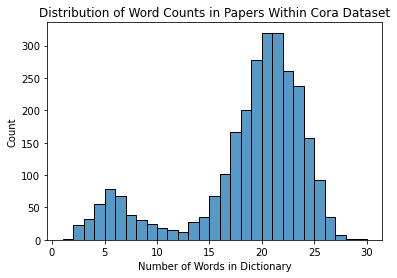

In [12]:
sns.histplot(x=np.array(node_features_df.sum(axis=1)), binwidth=1)
plt.xlabel("Number of Words in Dictionary")
plt.title("Distribution of Word Counts in Papers Within Cora Dataset", fontsize=12)
# plt.savefig(os.path.join(SAVE_PATH, "word_count_distribution.png"), bbox_inches="tight", facecolor="white")
plt.show()

Most of the papers in the Cora dataset have around 15-25 of the words contained in the 1433-word dictionary that has been one-hot encoded. This does not represent the full word count of the paper, however the dictionary will contain words that differentiate these published papers more than common words that would be reused in all scientific papers.

### Edge Matrix

In [8]:
print(cora_dataset.edge_index.shape)

torch.Size([2, 10556])


In [9]:
edge_index_df = pd.DataFrame(cora_dataset.edge_index.numpy(), index=["source_node", "dest_node"])
print(edge_index_df.shape)
edge_index_df.head(10)

(2, 10556)


,0,1,2,3,4,5,6,7,8,9,...,10546,10547,10548,10549,10550,10551,10552,10553,10554,10555
source_node,0,0,0,1,1,1,2,2,2,2,...,2704,2705,2706,2706,2706,2706,2707,2707,2707,2707
dest_node,633,1862,2582,2,652,654,1,332,1454,1666,...,641,287,165,169,1473,2707,165,598,1473,2706


For the graph edge information, we have a 2 x 10556 matrix representing the source and destination indices of each of the 10556 edges in the Cora dataset. Visualizations of these edges will be in the exploratory data analysis notebook.

### Labels

In [10]:
cora_dataset.y.shape

torch.Size([2708])

In [11]:
label_df = pd.DataFrame(cora_dataset.y.numpy(), columns=["class"])
print(label_df.shape)
label_df.head(10)

(2708, 1)


,class
0,3
1,4
2,4
3,0
4,3
5,2
6,0
7,3
8,3
9,2


For our class labels, we are given an index 0-6 representing which of the 7 categories that each of the 2708 nodes belongs to. We are not told in the dataset metadata what each of the 7 categories are, so we will assume 7 different subject categories of published papers.